노래의 특징(댄스 가능성, 라이브성, 음량, 에너지)을 바탕으로 노래가 히트할지 안할지 예측한다.

- 데이터 전처리, 머신러닝(모델 선택), 시각화
- 회귀 : 수치 예측
- 앙상블 : 여러 모델들을 혼합해 사용
- GridSearch : 하이퍼파라미터 자동 최적화

### 데이터셋
Kaggle 데이터셋 : https://www.kaggle.com/datasets/yasserh/song-popularity-dataset

진행목차
1. 데이터 불러오기
2. 데이터 분석(EDA)
3. 데이터 전처리
4. 인기 예측 회귀 모델
5. 성능 분석
6. 회귀 모델 고도화

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl	# 시각화도구(시각화 옵션, 폰트설정)
import matplotlib.pyplot as plt # 데이터 시각화용 도구
import seaborn as sns

### 종속변수
- song_popularity : 인기점수(0점~ 100점)
### 특징(독립 변수)
|특성명|설명|범위/값|
|----|----|----|
|- song_name| : 트랙제목| - |
|- song_duration_ms| : 노래길이|(밀리초 단위)|
|- acousicness| : 어쿠스틱 노래 가능성|(0~1)|
|- danceability| : 노래에 춤추기 적합한 정도 |(0~0.99)|
|- energy| : 노래의 에너지 강도 |(0~1.0)|
|- instrumentalness| : 노래에 보컬이 없을 가능성 |(0~1.0)|
|- key| : 음악 키 |(0 = c, 11 = b, 0~11)|
|- liveness| : 라이브 관객의 존재 추정 |(0.01~0.99)|
|- loudness| : 음량 레벨 |(-38.8 ~ 1.58)|
|- audio_mode| : 조성 |(1: 장조, 0: 단조)|
|- speechiness|  : 발화된 단어가 존재할 가능성 |(0.0~0.94)|
|- tempo| : 분당 박자|(npm)|
|- audio_valence| : 트랙의 긍정성 또는 쾌활함 |(0.0~0.98)|

In [3]:
mpl.rc("font" , family="NanumGothic") # 한글 폰트 설정

In [4]:
df = pd.read_csv('./data/song_data.csv',encoding='utf-8')
target = "song_popularity"
df

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,Let It Breathe,60,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300
18831,Answers,60,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265
18832,Sudden Love (Acoustic),23,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286
18833,Gentle on My Mind,55,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323


In [5]:
df.drop(['song_name'], axis=1, inplace=True) # song_name열은 사용하지 않아 삭제 

In [6]:
df.columns

Index(['song_popularity', 'song_duration_ms', 'acousticness', 'danceability',
       'energy', 'instrumentalness', 'key', 'liveness', 'loudness',
       'audio_mode', 'speechiness', 'tempo', 'time_signature',
       'audio_valence'],
      dtype='object')

In [7]:
features = [i for i in df.columns if i not in [target]] # 특성 필터링
origina_df = df.copy(deep=True) # 데이터 원본 보전 깊은 복사

In [13]:
print(f"이 데이터셋에는 {df.shape[1]}개의 특성과 {df.shape[0]}개의 샘플로 구성되어있다")

이 데이터셋에는 14개의 특성과 18835개의 샘플로 구성되어있다


탐색적 데이터 분석(EDA)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_popularity   18835 non-null  int64  
 1   song_duration_ms  18835 non-null  int64  
 2   acousticness      18835 non-null  float64
 3   danceability      18835 non-null  float64
 4   energy            18835 non-null  float64
 5   instrumentalness  18835 non-null  float64
 6   key               18835 non-null  int64  
 7   liveness          18835 non-null  float64
 8   loudness          18835 non-null  float64
 9   audio_mode        18835 non-null  int64  
 10  speechiness       18835 non-null  float64
 11  tempo             18835 non-null  float64
 12  time_signature    18835 non-null  int64  
 13  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5)
memory usage: 2.0 MB


In [8]:
# 숫자형, 범주형 특징 식별
nu = df[features].nunique().sort_values() # 각 특성별로 고유값(카테고리) 갯수 계산 후 정렬
nf = [] # 숫자형 특성 리스트 
cf = [] # 범주형 특성 리스트
nnf = 0 # 숫자형 특성 갯수
ncf = 0 # 범주형 특성 갯수

# nu 

# 16개 미만의 값을 가진 특징은 범주형으로 간주한다.
for i in range(df[features].shape[1]):
    if nu.values[i] <= 16:
        cf.append(nu.index[i])
    else:
        nf.append(nu.index[i])

print(f"이 데이터셋은 {len(nf)}개의 숫자형. {len(cf)}개의 범주형 특성을 가지고 있다")
print(f"범주형 특성 {cf}")
print(f"숫자형 특성 {nf}")


이 데이터셋은 10개의 숫자형. 3개의 범주형 특성을 가지고 있다
범주형 특성 ['audio_mode', 'time_signature', 'key']
숫자형 특성 ['danceability', 'energy', 'speechiness', 'audio_valence', 'liveness', 'acousticness', 'instrumentalness', 'loudness', 'song_duration_ms', 'tempo']


In [35]:
nu

audio_mode              2
time_signature          5
key                    12
danceability          849
energy               1132
speechiness          1224
audio_valence        1246
liveness             1425
acousticness         3209
instrumentalness     3925
loudness             8416
song_duration_ms    11771
tempo               12112
dtype: int64

In [19]:
df['song_popularity']

0        73
1        66
2        76
3        74
4        56
         ..
18830    60
18831    60
18832    23
18833    55
18834    60
Name: song_popularity, Length: 18835, dtype: int64

In [20]:
df.isnull().sum()

song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

In [23]:
df[nf].describe().T # 통계량을 행이 아닌 컬럼별로 한줄씩 보이게 한다


,count,mean,std,min,25%,50%,75%,max
danceability,18835.0,0.633348,0.156723,0.000000,0.5330,0.645000,0.74800,0.987
energy,18835.0,0.644995,0.214101,0.001070,0.5100,0.674000,0.81500,0.999
speechiness,18835.0,0.102099,0.104378,0.000000,0.0378,0.055500,0.11900,0.941
audio_valence,18835.0,0.527967,0.244632,0.000000,0.3350,0.527000,0.72500,0.984
liveness,18835.0,0.179650,0.143984,0.010900,0.0929,0.122000,0.22100,0.986
acousticness,18835.0,0.258539,0.288719,0.000001,0.0241,0.132000,0.42400,0.996
instrumentalness,18835.0,0.078008,0.221591,0.000000,0.0000,0.000011,0.00257,0.997
loudness,18835.0,-7.447435,3.827831,-38.768000,-9.0440,-6.555000,-4.90800,1.585
song_duration_ms,18835.0,218211.587576,59887.540566,12000.000000,184339.5000,211306.000000,242844.00000,1799346.000
tempo,18835.0,121.073154,28.714456,0.000000,98.3680,120.013000,139.93100,242.318


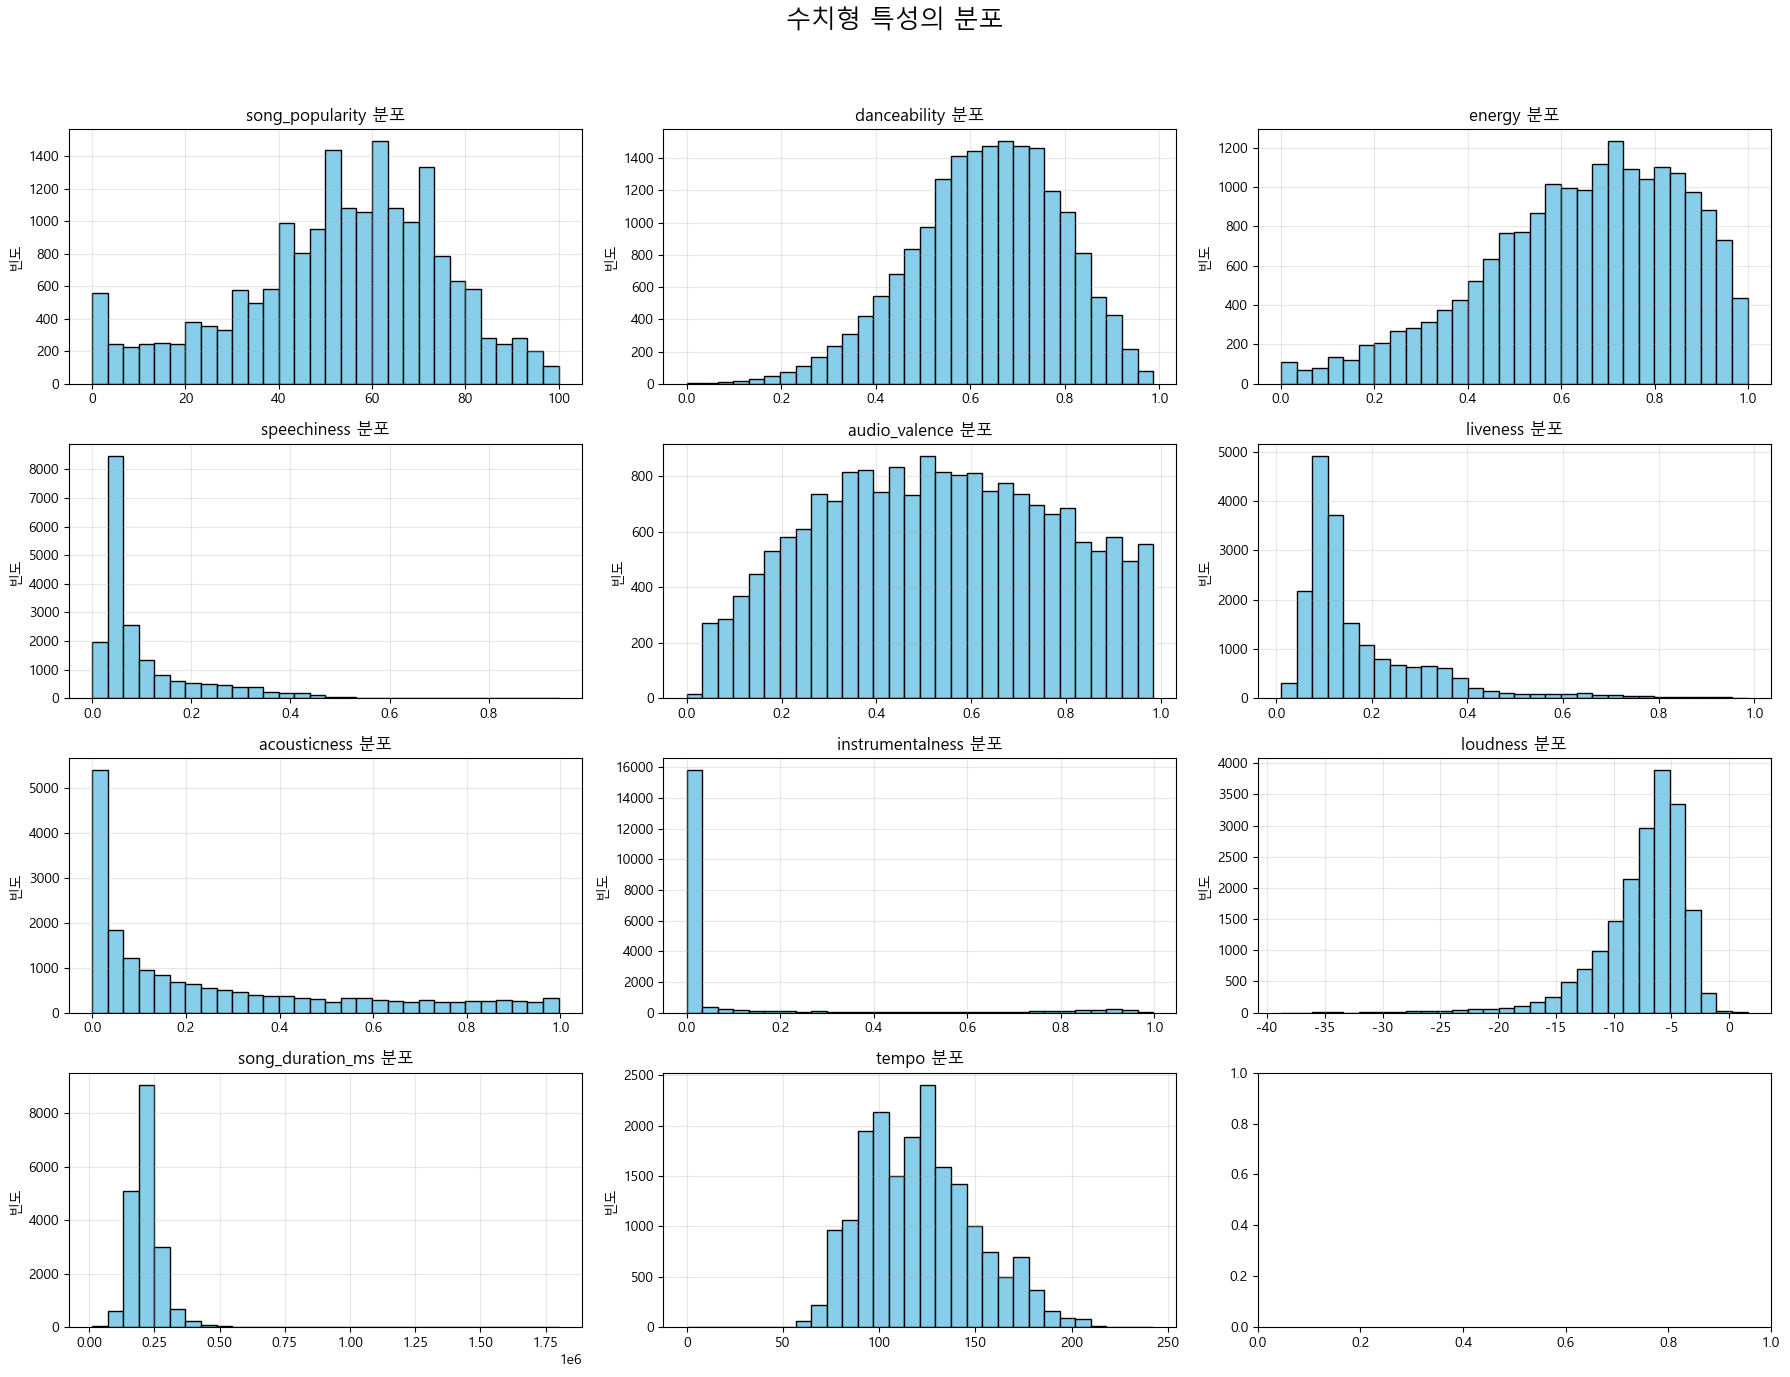

In [ ]:
# 수치형 변수의 분포
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False
columns = [target] + nf # 타켓(인기도)와 숫자형 특성들 리스트

fig, axes = plt.subplots(4,3,figsize=(18,14)) # 4행 3열의 서브플롯 생성

for idx, col in enumerate(columns):
    row = idx // 3              # 몇번째 행에 그릴지 결정 (4번째 인덱스:1)
    col_idx = idx % 3           # 몇번째 열에 그릴지 결정 (4번째 인덱스:1)
    axes[row][col_idx].hist(df[col].dropna(),bins=30,color='skyblue',edgecolor='black') # 히스토그램
    axes[row][col_idx].set_title(f"{col} 분포")
    axes[row][col_idx].set_ylabel("빈도")
    axes[row][col_idx].grid(alpha =0.3) # 격자 표시, 투명도 0.3

plt.suptitle("수치형 특성의 분포", fontsize=18)  # 그래프 전체 제목 설정
plt.tight_layout(rect=[0,0,1,0.95])             # 그래프 간격
plt.show()

우측이나 좌측으로 많이 쏠린 (왜도) 컬럼들은 로그변환들이 필요할 수 있다. 이를 통해 정규분포(가우시안 분포)에 가깝게 만들 수 있다

In [13]:
# 수치형 특성간 상관관계 매트릭스


In [ ]:
!pip install statsmodels

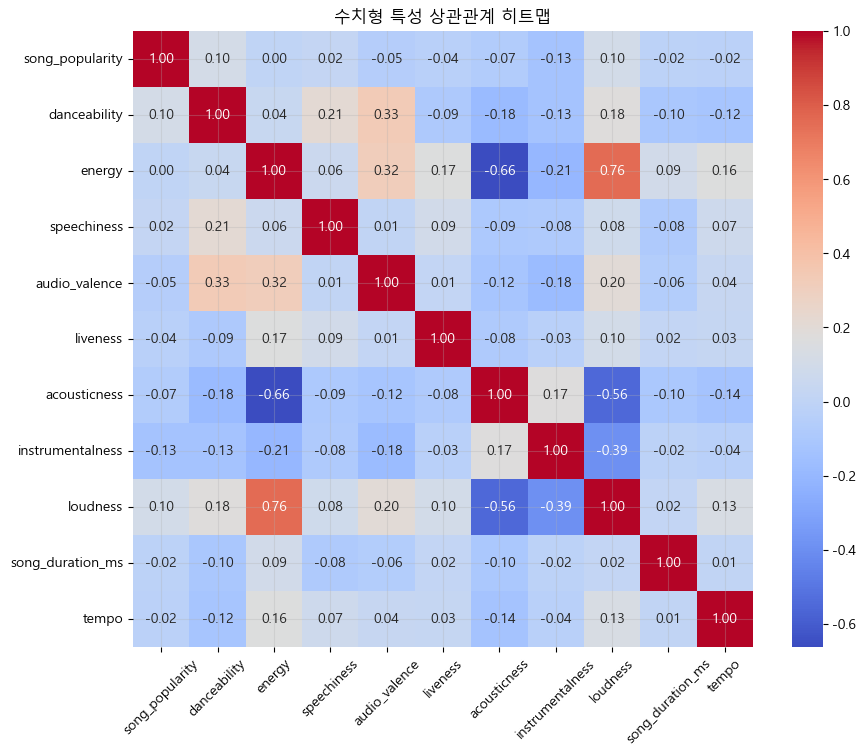

In [19]:
plt.figure(figsize=(10,8))
corr_matrix = df[[target]+nf].corr(numeric_only=True) # 수치형 변수들만 상관관계 계산
sns.heatmap(
    corr_matrix,    # 상관관계 데이터
    annot=True,     # 내부 값 표시
    fmt=".2f",      # 값 형태(소수점 두자리)
    cmap="coolwarm" # 컬러맵 설정
    )# 히트맵 시각화
plt.title('수치형 특성 상관관계 히트맵')
plt.xticks(rotation=45)
plt.grid(alpha = 0.3) # 투명도 30% 격자
plt.show()

수치형 변수들 확인 결과 목표 변수인 song_popularity와 매우 낮은 상관관계를 보이는 것을 확인.

일부 변수간의 상관관계가 오히려 더 있어보인다 (예, energy - loudness)
-> 다중공선성이 있다

만약 컬럼간의 중복성이 있다면 하나의 컬럼을 삭제하는것도 고려해봐야 한다.

다중공선성(특정 변수들간의 중복성) 확인하기 위해 VIF(Varience Inflation Factor)를 사용한다.
VIF 5를 초과하면 높은 다중공선성이 있고, 강한 상관관계를 가짐을 의미

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant #상수항 추가시에 사용

checking_columns = ['instrumentalness','energy','loudness','acousticness','audio_valence'] # vif 확인할 변수 목록
checking_columns
vif_df = df[checking_columns].copy()
vif_df = vif_df.dropna()

vif_data = add_constant(vif_df)

vif = pd.DataFrame()
vif['features'] = vif_data.columns
vif['VIF'] = [variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])] # 각 변수별 VIF 계산
vif = vif[vif['features'] != "const"] # 상수항 제외
vif

,features,VIF
1,instrumentalness,1.237084
2,energy,3.252280
3,loudness,2.751105
4,acousticness,1.834072
5,audio_valence,1.160981


1에 가까운 2개의 컬럼은 중복성이 매우 낮다

그 외 3개의 컬럼은 어느정도 중복성이 있어보인다.

그러나 5를 넘지 않았기 때문에 삭제를 고려할 정도의 수준은 아니다

C:\Users\Playdata\AppData\Local\Temp\ipykernel_21004\2363479042.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='audio_mode', y='song_popularity', data=df,palette='Set2')


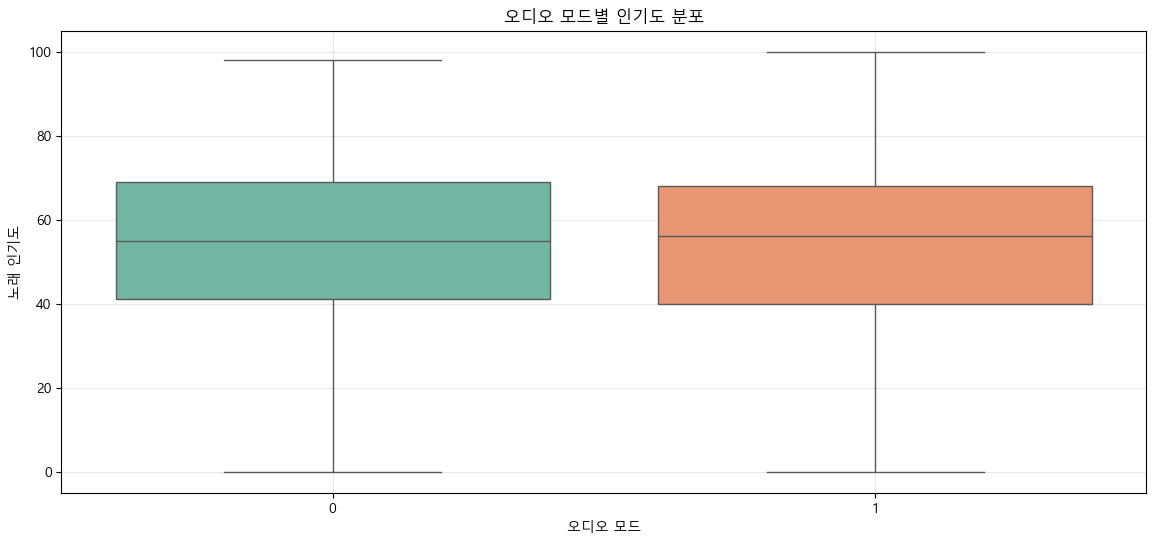

In [39]:
# 범주형 변수의 갑에 따른 song_popularity의 관계 확인
plt.figure(figsize=(14,6))
sns.boxplot(x='audio_mode', y='song_popularity', data=df,palette='Set2')
plt.title("오디오 모드별 인기도 분포")
plt.xlabel('오디오 모드')
plt.ylabel('노래 인기도')
plt.grid(alpha=0.3)
plt.show()

C:\Users\Playdata\AppData\Local\Temp\ipykernel_21004\3185175896.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='key', y='song_popularity', data=df,palette='Set2')


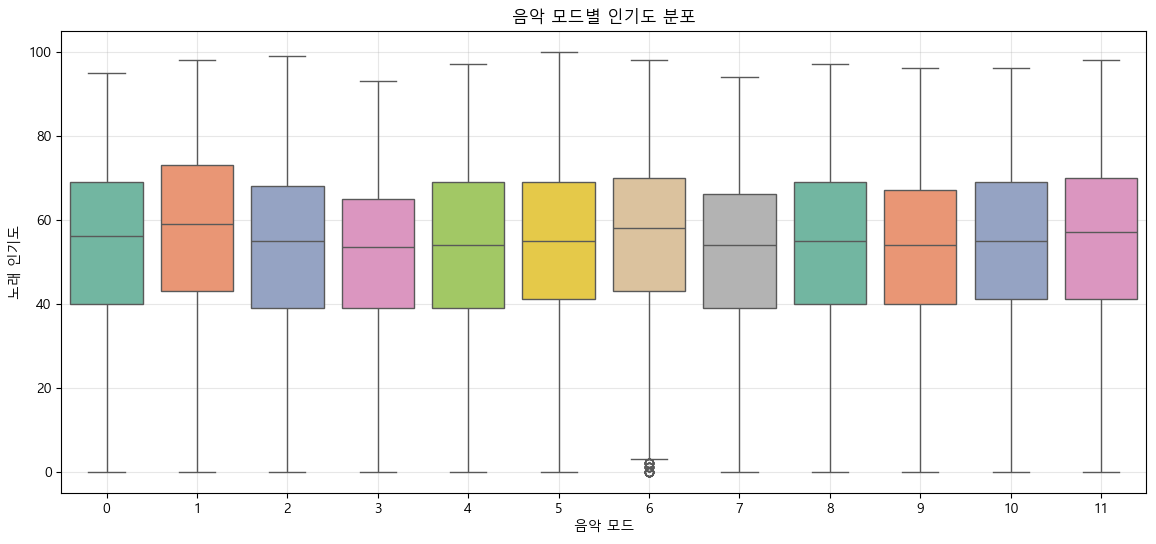

In [40]:
# 범주형 변수의 갑에 따른 song_popularity의 관계 확인
plt.figure(figsize=(14,6))
sns.boxplot(x='key', y='song_popularity', data=df,palette='Set2')
plt.title("음악 모드별 인기도 분포")
plt.xlabel('음악 모드')
plt.ylabel('노래 인기도')
plt.grid(alpha=0.3)
plt.show()

C:\Users\Playdata\AppData\Local\Temp\ipykernel_21004\3852303582.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='time_signature', y='song_popularity', data=df,palette='Set2')


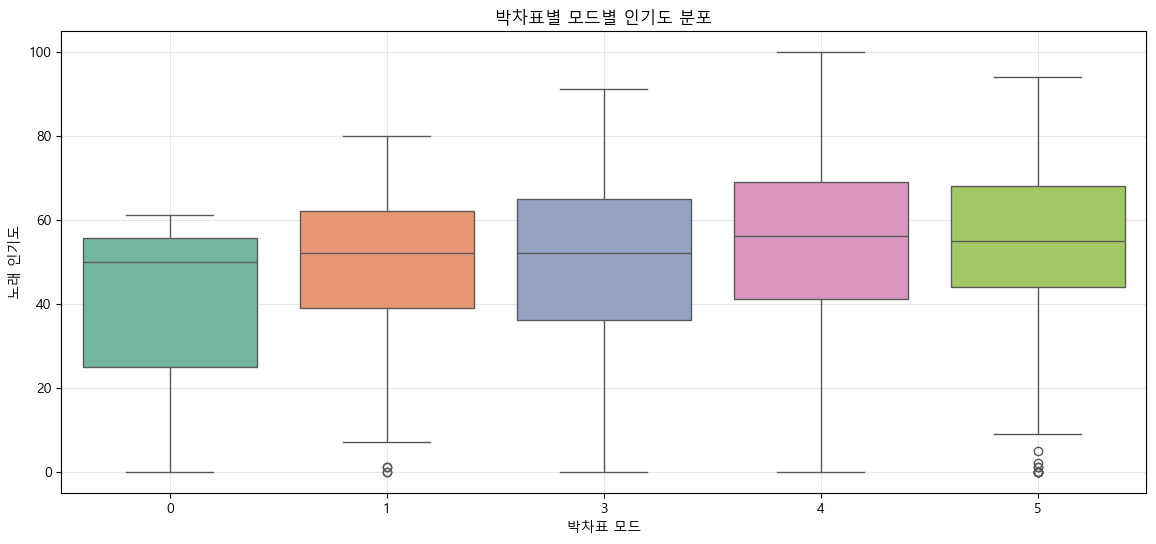

In [41]:
# 범주형 변수의 갑에 따른 song_popularity의 관계 확인
plt.figure(figsize=(14,6))
sns.boxplot(x='time_signature', y='song_popularity', data=df,palette='Set2')
plt.title("박차표별 모드별 인기도 분포")
plt.xlabel('박차표 모드')
plt.ylabel('노래 인기도')
plt.grid(alpha=0.3)
plt.show()

범주형 변수들은 개별적으로는 뚜렷한 패턴은 없었다

### 데이터 전처리
- 결측값 처리 : 결측값은 없었다.
- 이상치 : IQR 방식으로 탐지하여 제거한다.
- 특성 정규화 : 왜도가 있는 수치형 변수(speechiness,liveness,acousticness,instrumentalness)에 대해 정규화 적용해서 정규 분포에 가깝게 만들어준다.
- 범주형 변수 인코딩 : 모두 숫자이므로 인코딩 안해도 된다.

In [68]:
# 이상치 데이터 샘플링
df1 = df.copy()
features1 = nf + ["song_popularity"] # 숫자형 특성과 타겟 변수 포함 

for i in features1:
    Q1 = df1[i].quantile(0.25) # 1사분위수(25%)
    Q3 = df1[i].quantile(0.75) # 3사분위수(75%)
    IQR = Q3 - Q1
    df1 = df1[df1[i] <= (Q3 + (1.5 * IQR))] # 이상치 상한선(3사분위수 +1.5+IQR) 초과 샘플 제거
    df1 = df1[df1[i] >= (Q1 - (1.5 * IQR))] # 이상치 상한선(1사분위수 +1.5+IQR) 미만 샘플 제거
    df1 = df1.reset_index(drop=True)        # 인덱스 재설정

print(f"이상치 제거 전 데이터 수 : {df.shape[0]}")
print(f"이상치 제거 후 데이터 수 : {df1.shape[0]}")
df = df1.copy()



이상치 제거 전 데이터 수 : 11183
이상치 제거 후 데이터 수 : 7410


정규화 : 왜도가 있는 컬럼들에 대해 np.log1p를 적용한다.
=> 정규분포를 따르는 가우시안 분포를 그린다

In [69]:
skewed_columns = ["speechiness","liveness","acousticness","instrumentalness"] # 왜도가 확인된 특성 리스트
from copy import deepcopy

df_log = deepcopy(df)   # 원본 데이터 훼손 방지용 복사본 생성
df_log[skewed_columns] = df[skewed_columns].apply(np.log1p) # 해당 컬럼에 log1p(로그 변환) 적용

In [45]:
df_log

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,73,262333,0.005505,0.496,0.682,0.000029,8,0.057231,-4.095,1,0.028976,167.060,4,0.4740
1,66,216933,0.010247,0.542,0.853,0.000000,3,0.102557,-6.407,0,0.048600,105.256,4,0.3700
2,74,216933,0.026058,0.451,0.970,0.003544,0,0.097127,-4.938,1,0.101654,122.444,4,0.1980
3,56,223826,0.000954,0.447,0.766,0.000000,10,0.107059,-5.065,1,0.030820,172.011,4,0.5740
4,80,235893,0.008910,0.316,0.945,0.000002,4,0.333611,-3.169,0,0.116894,189.931,4,0.3200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11178,55,114582,0.640801,0.370,0.136,0.000263,7,0.095219,-13.528,1,0.042389,146.081,4,0.0592
11179,64,216173,0.621651,0.515,0.286,0.000069,5,0.100750,-11.776,1,0.037103,115.076,4,0.2840
11180,62,195106,0.332894,0.644,0.523,0.000000,4,0.088926,-7.660,1,0.037103,95.966,4,0.4450
11181,23,182211,0.613563,0.719,0.325,0.000000,0,0.117783,-12.222,1,0.034884,130.534,4,0.2860


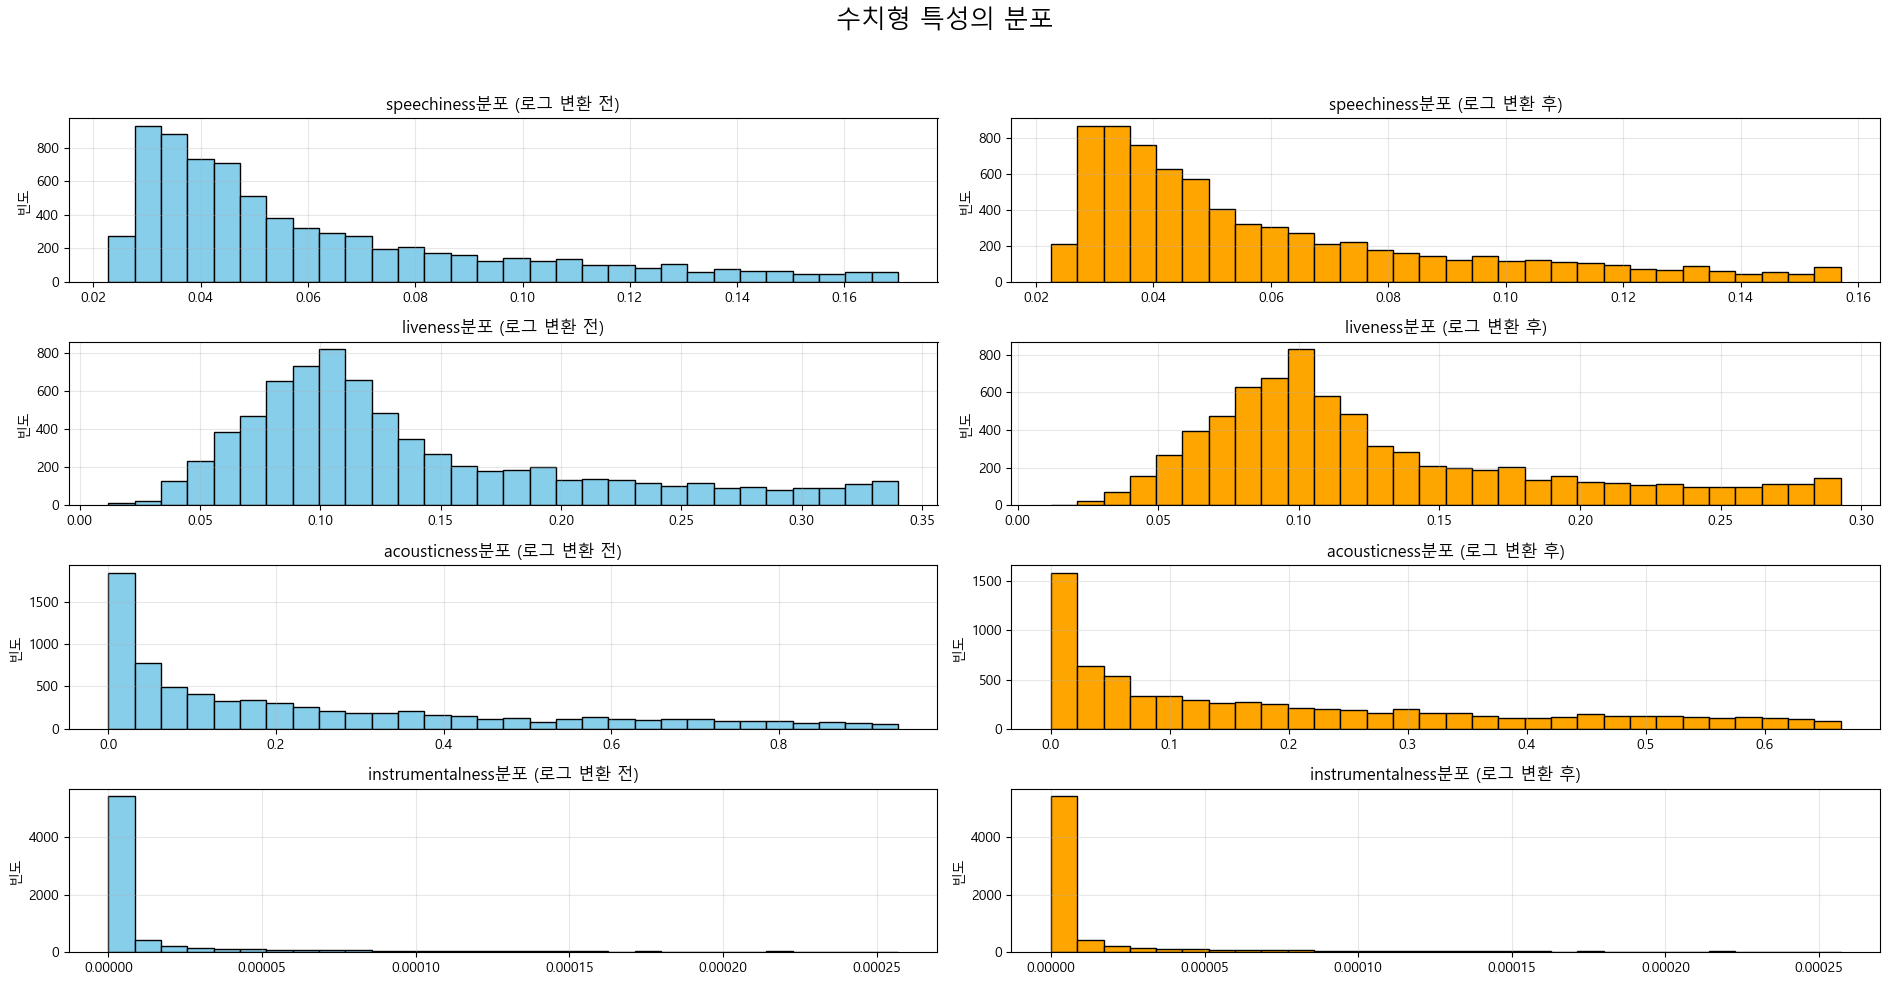

In [70]:
# 보정 전후로 분포 비교
fig, axes = plt.subplots(4,2,figsize=(19,10)) # 4행(각 컬럼) 2열(전/후) 서브플롯 생성
for idx,col in enumerate(skewed_columns):
    row = idx
    axes[row][0].hist(df[col].dropna(),bins=30, color='skyblue', edgecolor='black') # 로그 변환전 분포
    axes[row][0].set_title(f"{col}분포 (로그 변환 전)")
    axes[row][0].set_ylabel('빈도')
    axes[row][0].grid(alpha=0.3)

    axes[row][1].hist(df_log[col].dropna(), bins=30, color='orange', edgecolor='black')
    axes[row][1].set_title(f"{col}분포 (로그 변환 후)")
    axes[row][1].set_ylabel('빈도')
    axes[row][1].grid(alpha=0.3)

plt.suptitle('수치형 특성의 분포', fontsize = 18)
plt.tight_layout(rect=[0,0,1,0.95])
plt.show()


log1p 적용 후 분포 완화
수치로 변환하여 확인

In [52]:
before = df[skewed_columns].skew()
after  = df_log[skewed_columns].skew()

print("왜도(전)\n", before)
print("왜도(후)\n", after)


왜도(전)
 speechiness         1.552620
liveness            1.156883
acousticness        1.134955
instrumentalness    3.831057
dtype: float64
왜도(후)
 speechiness         1.470770
liveness            1.044367
acousticness        0.894389
instrumentalness    3.826448
dtype: float64


In [ ]:
df = df_log # 로그 변환된 데이터를 

노래 회귀 예측 모델 구현

In [58]:
# 선형 회귀 모델
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error # 회귀 성능 평가 지표
from sklearn.model_selection import train_test_split # e데이터셋 분할 함수

X = df[features]
y =df[target]

# 학습/테스트 데이터셋 분리 (80%:20%)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
print(len(X_train),len(X_test), len(y_train), len(y_test))


8946 2237 8946 2237


In [66]:
# LinearRegresion
lr_model = LinearRegression()
lr_model.fit(X_train,y_train) # 모델 학습

X_tr = X_train.iloc[:1000]
y_tr = y_train.iloc[:1000]

y_pred_lr = lr_model.predict(X_test)

# 학습 데이터 평가(1000개)
print("Train MSE:", mean_squared_error(y_train[:1000], lr_model.predict(X_train[:1000])))
print("Train MAE:", mean_absolute_error(y_train[:1000], lr_model.predict(X_train[:1000])))
print("Train r2 스코어:", r2_score(y_train[:1000], lr_model.predict(X_train[:1000])))
print()
# # 테스트셋 데이터 쳥가
print("MSE:", mean_squared_error(y_test,y_pred_lr)) # 테스트셋 mse
print("MAE:", mean_absolute_error(y_test,y_pred_lr)) # 테스트셋 mse
print("R2_스코어:", r2_score(y_test,y_pred_lr)) # 테스트셋 mse



Train MSE: 431.39292792189286
Train MAE: 16.574942127034483
Train r2 스코어: 0.06860452654632809

MSE: 439.1950711692975
MAE: 16.692853852327655
R2_스코어: 0.05035426907280527


선형 회귀 모델로는 성능이 매우 뒤떨어짐을 확인하였습니다.

다른 모델을 사용해봐야겠다.

In [ ]:
########### 확인 요망
# 다항 회귀 모델 : n차다항식을 사용하여 비선형 관계를 모델링하는 모델.
# 단점으로는 모델의 차수가 지나치게 높아지면 모델 복잡성이 커져 과적합 가능성이 있는 모델이다.
from sklearn.preprocessing import PolynomialFeatures

# degree = 2 # 다항식 특성의 차수
# poly = PolynomialFeatures(degree) # 특성을 다항식 특성으로 변환
# X_train_poly = poly.fit_transform(X_train) # 학습 데이터 변환(fit_transform)
# X_test_poly = poly.transform(X_test)    # 테스트 데이터 변환

# # 다항식 특성으로 모델 학습
# poly_lr_model = LinearRegression()
# poly_lr_model.fit(X_train,y_train)

# # 예측
# y_pred_test = poly_lr_model.predict(X_test_poly) # 테스트 예측

# # 학습 데이터 평가(1000개)
# print("Train MSE:", mean_squared_error(y_train[:1000], lr_model.predict(X_train[:1000])))
# print("Train MAE:", mean_absolute_error(y_train[:1000], lr_model.predict(X_train[:1000])))
# print("Train r2 스코어:", r2_score(y_train[:1000], lr_model.predict(X_train[:1000])))
# print()

# # # 테스트셋 데이터 쳥가
# print("MSE:", mean_squared_error(y_test,y_pred_lr)) # 테스트셋 mse
# print("MAE:", mean_absolute_error(y_test,y_pred_lr)) # 테스트셋 mse
# print("R2_스코어:", r2_score(y_test,y_pred_lr)) # 테스트셋 mse
degree = 2
poly = PolynomialFeatures(degree=degree, include_bias=False)  # 권장: 상수항 중복 방지

X_train_poly = poly.fit_transform(X_train)
X_test_poly  = poly.transform(X_test)

# 다항특성으로 모델 학습
poly_lr_model = LinearRegression()
poly_lr_model.fit(X_train_poly, y_train)

# 예측
y_pred_test = poly_lr_model.predict(X_test_poly)

# (선택) Train 예측(앞 1000개만)
y_train_1000 = y_train.iloc[:1000]
X_train_poly_1000 = X_train_poly[:1000]
y_pred_train_1000 = poly_lr_model.predict(X_train_poly_1000)

print("Train MSE:", mean_squared_error(y_train_1000, y_pred_train_1000))
print("Train MAE:", mean_absolute_error(y_train_1000, y_pred_train_1000))
print("Train R2:",  r2_score(y_train_1000, y_pred_train_1000))
print()

# Test 평가
print("Test MSE:", mean_squared_error(y_test, y_pred_test))
print("Test MAE:", mean_absolute_error(y_test, y_pred_test))
print("Test R2:",  r2_score(y_test, y_pred_test))


Train MSE: 427.40519727153736
Train MAE: 16.487287607760997
Train R2: 0.07721420472298568

Test MSE: 431.95926854403723
Test MAE: 16.550841582812595
Test R2: 0.06599982050082087


In [76]:
# 기존 선형 모델보다는 약간 나아진 모습은 있지만, 성능은 낮다
# RandomForest 회귀 모델 :  여러개의 의사결정 나무를 결합해 비선형적이고 앙상블  기반의 학습을 제공한다.
# 앙상블 사용 -> 과적합에도 강하다.
from sklearn.ensemble import RandomForestRegressor # 랜덤 포레스트 회귀 모델

rf_model =RandomForestRegressor(random_state=42) # 랜덤 포레스트(앙상블) 모델 생성
rf_model.fit(X_train, y_train) # 학습 데이터로 모델 학습

# 예측
y_pred_rf = rf_model.predict(X_test)

# 학습 데이터 평가(1000개)
print("Train MSE:", mean_squared_error(y_train[:1000], rf_model.predict(X_train[:1000])))
print("Train MAE:", mean_absolute_error(y_train[:1000], rf_model.predict(X_train[:1000])))
print("Train r2 스코어:", r2_score(y_train[:1000], rf_model.predict(X_train[:1000])))
print()

# # 테스트셋 데이터 쳥가
print("MSE:", mean_squared_error(y_test,y_pred_rf)) # 테스트셋 mse
print("MAE:", mean_absolute_error(y_test,y_pred_rf)) # 테스트셋 mse
print("R2_스코어:", r2_score(y_test,y_pred_rf)) # 테스트셋 mse


Train MSE: 42.92184447175594
Train MAE: 4.5485193200174
Train r2 스코어: 0.9073299327231572

MSE: 275.2681637438434
MAE: 11.82462345563751
R2_스코어: 0.4048038019562755


전 모델들에 비해서는 향상되었지만, 정대적인 성능은 약간 부족하다.

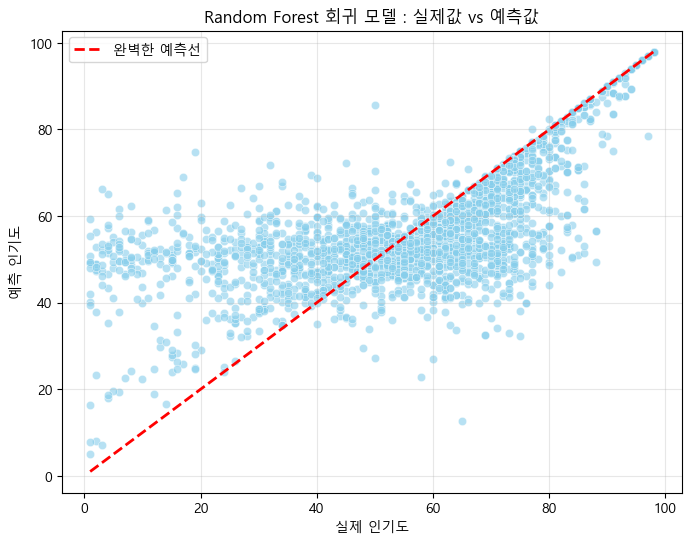

In [77]:
# 성능 시각화 (실제값 vs 예측값)
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_rf, color='skyblue', alpha=0.6)  # 산점도 : 실제값 vs 예측값
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()],"r--", linewidth=2, label="완벽한 예측선") # 대각선(정답선)
plt.xlabel("실제 인기도")
plt.ylabel("예측 인기도")
plt.title("Random Forest 회귀 모델 : 실제값 vs 예측값")
plt.legend()
plt.grid(alpha=0.3)


인기도가 원래 있던 곡들은 그나마 맞추는 편, 인기도가 실제 없엇던 곡들은 못맞추는 경향을 보인다.

In [ ]:
# Random Forest 모델이 예측할때 중요도 분석
importance = rf_model.feature_importances_ # 뒤에 _를 붙히면 모델이 학습이 끝난후에 나오는 특성 및 분석 결과등 여러가지 결과값을 알수있다
features =X.columns # 특성명 리스트 

feat_df = pd.DataFrame({"특성": features, "중요도": importance}) # 데이터 프레임 생성

feat_df = feat_df.sort_values(by="중요도", ascending=False ,inplace=True)
feat_df

,특성,중요도
7,loudness,0.111859
12,audio_valence,0.107169
2,danceability,0.099559
1,acousticness,0.099003
3,energy,0.098154
6,liveness,0.095773
0,song_duration_ms,0.093699
10,tempo,0.090393
9,speechiness,0.087150
4,instrumentalness,0.060360


C:\Users\Playdata\AppData\Local\Temp\ipykernel_21004\2806977043.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="중요도", y="특성", data = feat_df.head(10) ,color='skyblue', alpha=0.6, palette='viridis')  # 상위 10개 특성 중요도 var플롯


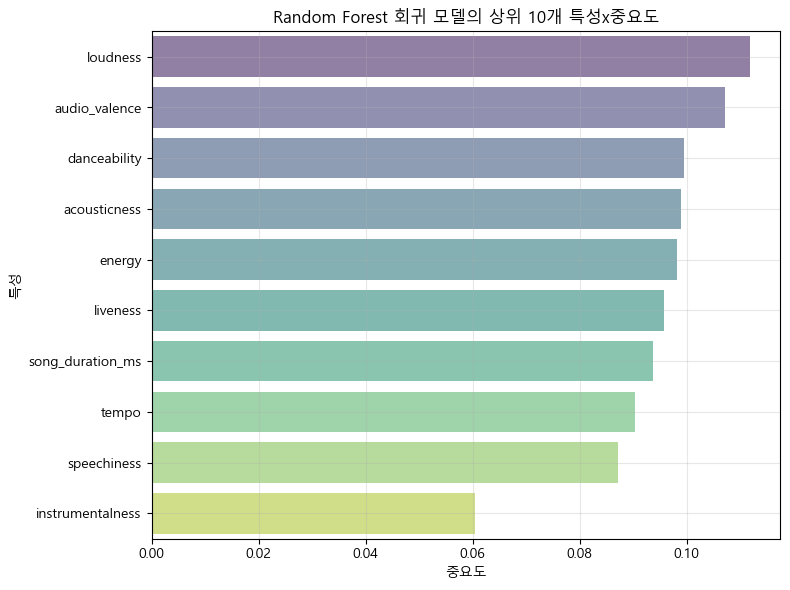

In [80]:
# 시각화
plt.figure(figsize=(8,6))
sns.barplot(x="중요도", y="특성", data = feat_df.head(10) ,color='skyblue', alpha=0.6, palette='viridis')  # 상위 10개 특성 중요도 var플롯
plt.xlabel("중요도")
plt.ylabel("특성")
plt.title("Random Forest 회귀 모델의 상위 10개 특성x중요도")
plt.tight_layout()
plt.grid(alpha=0.3) # 격자

In [ ]:
# 1 상위 3개를 확인했을때 특성의 중요도가 0.1 정도로 매우 낮다.
# 2. => 인기도는 특성만으로 뽑기가 좀 애매한 면이 있어 주관적인 사항도 같이 특성으로 반영을 해주면 더 좋은 결과를 얻을두소 있디.

### 회귀 모델 고도화
GridSearchCV를 사용해서 Random Forest 모델을 고도화 하려고 한다.

n_estimators : 숲을 구성할 트리의 갯수 (기본값 100)

max_depth : 각 트리의 최대 깊이 (기본값 None : 모든 리프 노드가 가장 순수해질 때까지 나무성장)

min_samples_split : 내부 노드를 분할하기 위해 필요한 최고 샘플 수 (기본값 : 2)

하이퍼파라미터 튜닝 도구는 GridSearchCV akfrheh Optuna도 있다.

In [84]:
from sklearn.model_selection import GridSearchCV    # 하이퍼파라미터 튜닝 도구

param_grid = {
    "n_estimators": [100, 200, 500],     # 트리 갯수
    "max_depth": [None, 10, 20],    # 트리 최대 깊이
    "min_samples_split": [2, 5],    # 내부 노드를 분할하기 위한 최소 샘플 수
}

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(
    rf,                                   # 최적 파라미터를 뽑아낼 모델
    param_grid,                           # 최적 파라미터를 테스트할 값들을 설정
    cv = 5,                               # 5-fold 교차검증 / 데이터셋을 각자 나눠서 각자 돌리는 느낌
    scoring = "neg_mean_squared_error",   # 성능 평가지표: 평균제곱오차 MSE
    n_jobs = -1,                          # 모든 CPU 사용(병렬)
    verbose = 2                           # 진행사항 출력
)

grid_search.fit(X_train, y_train) # 하이파라미터 튜닝(모델 학습)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestR...ndom_state=42)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'max_depth': [None, 10, ...], 'min_samples_split': [2, 5], 'n_estimators': [100, 200]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'neg_mean_squared_error'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is di

In [88]:
best_rf = grid_search.best_estimator_     # 최적의 하이퍼파라미터로 학습된 Random Foresst 모델
print(f"최고의 설정값은 {grid_search.best_params_}") #파라미터 조합 중 가장 겅능이 좋은 조합 출력

최고의 설정값은 {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


최고의 설정값
- 'max_depth' : None, 'min_samples

In [90]:
rf_model = RandomForestRegressor(n_estimators=200, random_state=42) # 최적의 설정값으로 나온 트리 개수만 200개로 추가 설정
rf_model.fit(X_train, y_train) # 학습 데이터로 모델 학습

# 예측
y_pred_rf =rf_model.predict(X_test) # 테스트셋 예측

print("Train MSE:", mean_squared_error(y_train[:1000], rf_model.predict(X_train[:1000])))
print("Train MAE:", mean_absolute_error(y_train[:1000], rf_model.predict(X_train[:1000])))
print("Train r2 스코어:", r2_score(y_train[:1000], rf_model.predict(X_train[:1000])))
print()

# # 테스트셋 데이터 쳥가
print("MSE:", mean_squared_error(y_test,y_pred_rf)) # 테스트셋 mse
print("MAE:", mean_absolute_error(y_test,y_pred_rf)) # 테스트셋 mse
print("R2_스코어:", r2_score(y_test,y_pred_rf)) # 테스트셋 mse


Train MSE: 42.32198980080225
Train MAE: 4.528062923541737
Train r2 스코어: 0.9086250441844129

MSE: 272.90648739442486
MAE: 11.804630601100548
R2_스코어: 0.40991031614616835


R2 스코어 기준 0.40 -> 0.41로 소폭 상승

# 모델변경 (Boosting 계열)
- XGBoost  : 약한 모델에서부터 순차적으로 트리를 추가하는 방식의 그래디언트 부스팅 알고리즘. 높은 정확도와 유연성
- LightGBM : 더 빠르고 효율적인 그래디언트 부스팅 알고리즘. 내부적으로 히스토그램 기반의 분할 방식과 리프 중심 트리 성장을 사용한다.

In [ ]:
!pip install xgboost

In [96]:
from xgboost import XGBRegressor

xgb_param_grid = {
    'n_estimators' : [100,200],  # 트리 갯수
    'max_depth' : [None, 10,20], # 트리 최대 깊이
    'learning_rate' : [0.1,0.01],# 학습률(클수록 빠른 학습, 불안정성 증가)
    'min_child_weight' : [1,2]   # 리프노드 최소 가중치 
}

xgb_model = XGBRegressor(random_state=42)
xgb_grid_search = GridSearchCV(
    xgb_model,
    xgb_param_grid,                         
    cv=5,                                   # 5-fold 교차검증
    scoring= 'neg_mean_squared_error',      # 성능 평가지표 : 평균제곱오차 MSE
    n_jobs = -1,
    verbose = 2
)

xgb_grid_search.fit(X_train,y_train)    # 하이퍼파라미터 튜닝 학습
xgb_model =xgb_grid_search.best_estimator_ # 최적의 XGBoost 모델

xgb_model.fit(X_train,y_train) # 최적의 XGBoost 모델으로 학습

y_pred = xgb_model.predict(X_test)  # 테스트데이터로 예측

# 평가
xgb_mse_test = mean_squared_error(y_test, y_pred)   
xgb_mae_test = mean_absolute_error(y_test, y_pred)   
xgb_r2_test = r2_score(y_test, y_pred)   

print("XGBoost MSE :", xgb_mse_test)
print("XGBoost MAE :", xgb_mae_test)
print("XGBoost R2 :", xgb_r2_test)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
XGBoost MSE : 284.2728271484375
XGBoost MAE : 11.4495267868042
XGBoost R2 : 0.3853335380554199


In [ ]:
!pip install lightgbm

In [98]:
from lightgbm import LGBMRegressor
lgbm_model = LGBMRegressor(
    n_estimators=100,           # 트리의 갯수
    max_depth = 1,              # 트리의 최대 깊이
    learning_rate= 0.1,         # 학습률
    num_leaves = 100            # 하나의 트리에서 가질수있는 최대 잎사귀 수
)

lgbm_model.fit(X_train,y_train)    # 하이퍼파라미터 튜닝 학습


y_pred = lgbm_model.predict(X_test)  # 테스트데이터로 예측

# 평가
lgbm_mse_test = mean_squared_error(y_test, y_pred)   
lgbm_mae_test = mean_absolute_error(y_test, y_pred)   
lgbm_r2_test = r2_score(y_test, y_pred)   

print("lgbmoost MSE :", lgbm_mse_test)
print("lgbmoost MAE :", lgbm_mae_test)
print("lgbmoost R2 :", lgbm_r2_test)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000571 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2566
[LightGBM] [Info] Number of data points in the train set: 8946, number of used features: 13
[LightGBM] [Info] Start training from score 56.049072
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

가장 성능이 좋았던 것은 GridSearchCV를 사용해 최적의 파라미터를 구해서 사용한 RandomForestRegressor 모델이었다.
여기서 성능을 더 높이고싶다면
- GridSearchCV의 테스트 파라미터를 더 늘려서 해보거나(RF, XGB)
- 데이터를 다른 데이터로 변경